In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold


In [2]:
df_master = pd.read_pickle('../master/master.pkl')

In [3]:
df_master.columns

Index(['user_id', 'dateString', 'userDate', 'isEmployed', 'isInsider',
       'hasLogin', 'firstActivity', 'hasConnect', 'role', 'dateHour',
       'probLogonRole', 'webCount', 'countPC', 'employee_name', 'psyc_O',
       'psyc_C', 'psyc_E', 'psyc_A', 'psyc_N', 'numMonthsEmployed',
       'sumExtEmailSize', 'sumExtEmailAttachments', 'numExtEmails',
       'probLogonUser', 'webQuestionableUsage'],
      dtype='object')

In [4]:
X = df_master.drop(['user_id', 'dateString', 'userDate','dateHour','isInsider','employee_name'], axis=1)

In [5]:
X = pd.get_dummies(X, columns=['role'])

In [6]:
X = X.fillna(-999)

In [7]:
X

,isEmployed,hasLogin,firstActivity,hasConnect,probLogonRole,webCount,countPC,psyc_O,psyc_C,psyc_E,...,role_Salesman,role_Scientist,role_SecurityGuard,role_SoftwareEngineer,role_Statistician,role_SystemsEngineer,role_TechnicalTrainer,role_Technician,role_TestEngineer,role_VicePresident
0,1,-999.0,-999.0,-999.0,0.000000,-999.0,-999.0,39,39,41,...,0,0,0,0,0,0,0,0,0,0
1,1,-999.0,-999.0,-999.0,0.000000,-999.0,-999.0,39,39,41,...,0,0,0,0,0,0,0,0,0,0
2,1,-999.0,-999.0,-999.0,0.000000,-999.0,-999.0,39,39,41,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,-999.0,-999.0,0.226949,32.0,1.0,39,39,41,...,0,0,0,0,0,0,0,0,0,0
4,1,1.0,-999.0,-999.0,0.226949,-999.0,1.0,39,39,41,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636277,1,-999.0,-999.0,-999.0,0.000000,-999.0,-999.0,38,48,39,...,0,0,0,0,0,0,0,0,0,0
636278,1,-999.0,-999.0,-999.0,0.000000,-999.0,-999.0,38,48,39,...,0,0,0,0,0,0,0,0,0,0
636279,1,-999.0,-999.0,-999.0,0.000000,-999.0,-999.0,38,48,39,...,0,0,0,0,0,0,0,0,0,0
636280,1,-999.0,-999.0,-999.0,0.000000,-999.0,-999.0,38,48,39,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y = df_master['isInsider']

In [9]:
y

0         0
1         0
2         0
3         0
4         0
         ..
636277    0
636278    0
636279    0
636280    0
636281    0
Name: isInsider, Length: 636282, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# calculate the scale_pos_weight parameter
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(scale_pos_weight)

11310.666666666666


In [12]:
dtrain = xgb.DMatrix(X_train, label=y_train, missing=-999)
dtest = xgb.DMatrix(X_test, label=y_test, missing=-999)

In [13]:
params = {
    'max_depth': 3, 
    'eta': 0.1, 
    'objective': 'binary:logistic',
    'scale_pos_weight': scale_pos_weight
    }

num_rounds = 100
model = xgb.train(params, dtrain, num_rounds, evals=[(dtest, 'test')], early_stopping_rounds=10)

[0]	test-logloss:0.59897
[1]	test-logloss:0.52192
[2]	test-logloss:0.45759
[3]	test-logloss:0.40327
[4]	test-logloss:0.35686
[5]	test-logloss:0.31658
[6]	test-logloss:0.28188
[7]	test-logloss:0.25163
[8]	test-logloss:0.22490
[9]	test-logloss:0.20158
[10]	test-logloss:0.18083
[11]	test-logloss:0.16223
[12]	test-logloss:0.14574
[13]	test-logloss:0.13109
[14]	test-logloss:0.11805
[15]	test-logloss:0.10642
[16]	test-logloss:0.09604
[17]	test-logloss:0.08676
[18]	test-logloss:0.07845
[19]	test-logloss:0.07101
[20]	test-logloss:0.06426
[21]	test-logloss:0.05824
[22]	test-logloss:0.05284
[23]	test-logloss:0.04799
[24]	test-logloss:0.04355
[25]	test-logloss:0.03961
[26]	test-logloss:0.03605
[27]	test-logloss:0.03285
[28]	test-logloss:0.02991
[29]	test-logloss:0.02731
[30]	test-logloss:0.02495
[31]	test-logloss:0.02281
[32]	test-logloss:0.02088
[33]	test-logloss:0.01914
[34]	test-logloss:0.01756
[35]	test-logloss:0.01616
[36]	test-logloss:0.01486
[37]	test-logloss:0.01370
[38]	test-logloss:0.01

In [14]:
predictions = model.predict(dtest)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127246
           1       0.24      1.00      0.39        11

    accuracy                           1.00    127257
   macro avg       0.62      1.00      0.69    127257
weighted avg       1.00      1.00      1.00    127257



In [ ]:
#threshold tuning

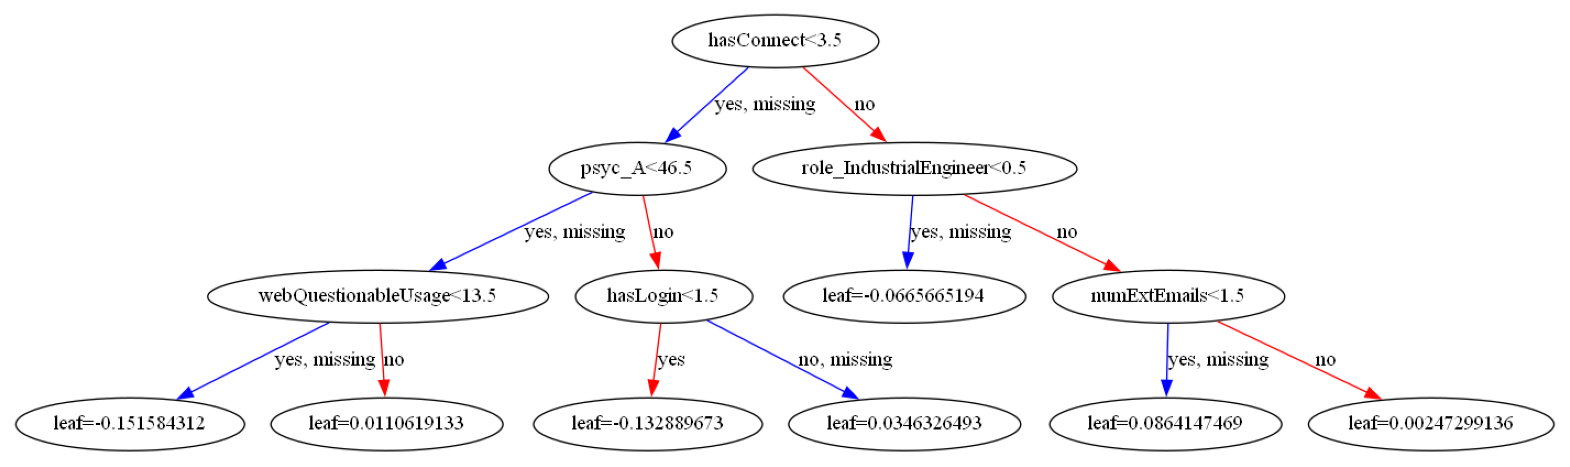

In [28]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

fig, ax = plt.subplots(figsize=(20, 8))
xgb.plot_tree(model, ax=ax, num_trees=99)
plt.show()

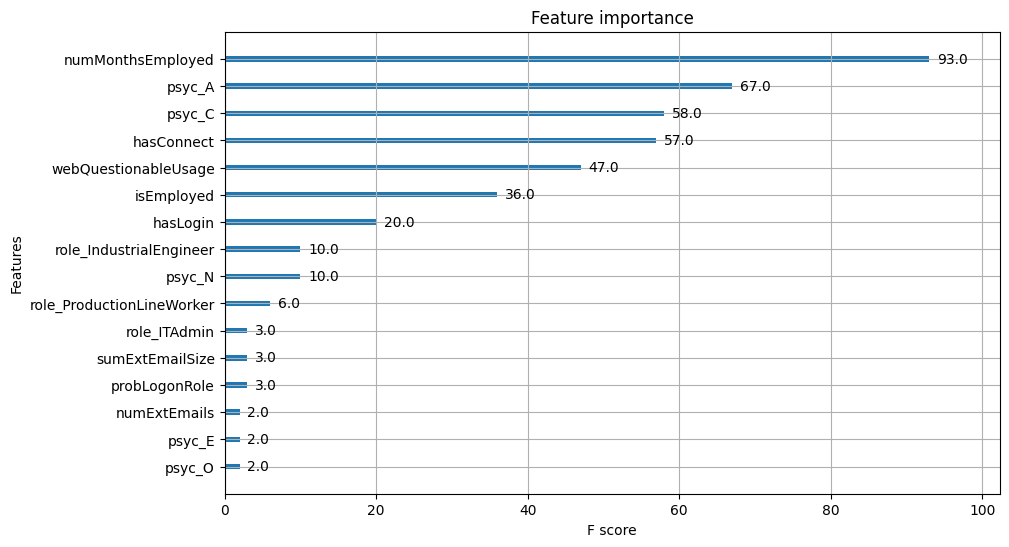

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
xgb.plot_importance(model, ax=ax)
plt.show()

In [ ]:
sample = pd.DataFrame({'isEmployed':[1], 
                       'hasLogin':[4], 
                       'firstActivity':[1], 
                       'hasConnect':[2],
                       'probLogonRole':[.1], 
                       'webCount':[0], 
                       'countPC':[0], 
                       'psyc_O':[10], 
                       'psyc_C':[20], 
                       'psyc_E':[30],
                       'psyc_A':[99], 
                       'psyc_N':[10], 
                       'numMonthsEmployed':[1], 
                       'sumExtEmailSize':[40000],
                       'sumExtEmailAttachments':[0], 
                       'numExtEmails':[0], 
                       'probLogonUser':[0],
                       'webQuestionableUsage':[200], 
                       'role_Accountant':[0],
                       'role_AdministrativeAssistant':[0], 
                       'role_AdministrativeStaff':[0],
                       'role_AssemblySupervisor':[0], 
                       'role_Attorney':[0], 
                       'role_ChiefEngineer':[0],
                       'role_ComputerProgrammer':[0], 
                       'role_ComputerScientist':[0],
                       'role_ComputerTrainer':[0], 
                       'role_Director':[0], 
                       'role_ElectricalEngineer':[0],
                       'role_Engineer':[0],
                       'role_FieldServiceEngineer':[0], 
                       'role_FinancialAnalyst':[0],
                       'role_HardwareEngineer':[0], 
                       'role_HealthSafetyEngineer':[0],
                       'role_HumanResourceSpecialist':[0], 
                       'role_ITAdmin':[0],
                       'role_IndustrialEngineer':[1], 
                       'role_LabManager':[0], 
                       'role_ManagementTrainer':[0],
                       'role_Manager':[0], 
                       'role_MaterialsEngineer':[0], 
                       'role_Mathematician':[0],
                       'role_MechanicalEngineer':[0], 
                       'role_Nurse':[0], 
                       'role_NursePractitioner':[0],
                       'role_Physicist':[0], 
                       'role_President':[0], 
                       'role_ProductionLineWorker':[0],
                       'role_PurchasingClerk':[0], 
                       'role_Salesman':[0], 
                       'role_Scientist':[0],
                       'role_SecurityGuard':[0],
                       'role_SoftwareEngineer':[0], 
                       'role_Statistician':[0],
                       'role_SystemsEngineer':[0], 
                       'role_TechnicalTrainer':[0], 
                       'role_Technician':[0],
                       'role_TestEngineer':[0], 
                       'role_VicePresident':[0]})

In [ ]:
model.predict(xgb.DMatrix(sample))

In [ ]:
X.columns

In [ ]:
scores = model.get_score(importance_type='weight')

# Display feature importance scores
for feature, score in scores.items():
    print('{}: {}'.format(feature, score))

In [ ]:
model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
#n_jobs=-1 - user all the processors

scores_KFold = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [ ]:
np.mean(scores_KFold)